# 필요한 라이브러리 불러오기 및 준비사항

In [1]:
import numpy as np # 수치 연산을 위한 라이브러리
import pandas as pd # 데이터프레임 생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 그래프 스타일(서식) 설정
sns.set(font_scale = 2.5) # font 크기 설정

import missingno as msno # null 데이터를 쉽게 보여주는 라이브러리

# warning 무시하기
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline 

# 데이터 업로드 및 데이터프레임 생성

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

# 데이터 정보 확인하기

1. PassengerId – 승객 번호
2. Survived - 생존 여부 (0 = 사망, 1 = 생존)
3. Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
4. Name – 승객 이름
5. Sex - 성별
6. Age - 나이
7. SibSp - 함께 탑승한 자녀(Sibling) / 배우자 의 수(Spouse)
8. Parch - 함께 탑승한 부모님(Parent) / 아이들 의 수(Child)
9. Ticket - 티켓 번호
10. Fare - 탑승 요금
11. Cabin - 객실 번호
12. Embarked - 선착장 (C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
df_train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 결측치 확인하기
NaN (Not a Number) - 연산 과정에서 잘못된 입력을 받았음을 나타내는 기호

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg) # :>10 는 10칸을 만들고 오른쪽으로 정렬

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


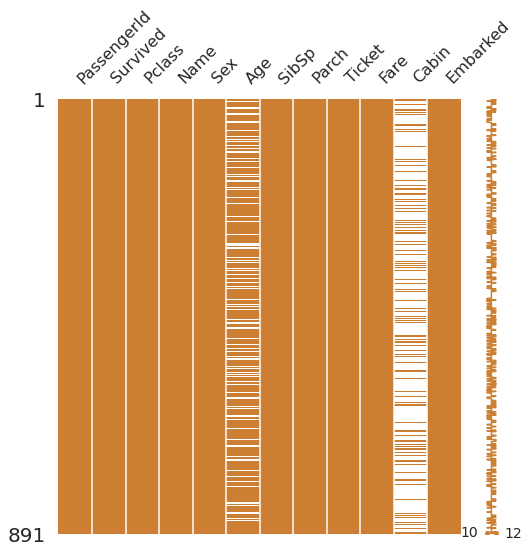

In [12]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # null data의 위치를 확인하기에 용이

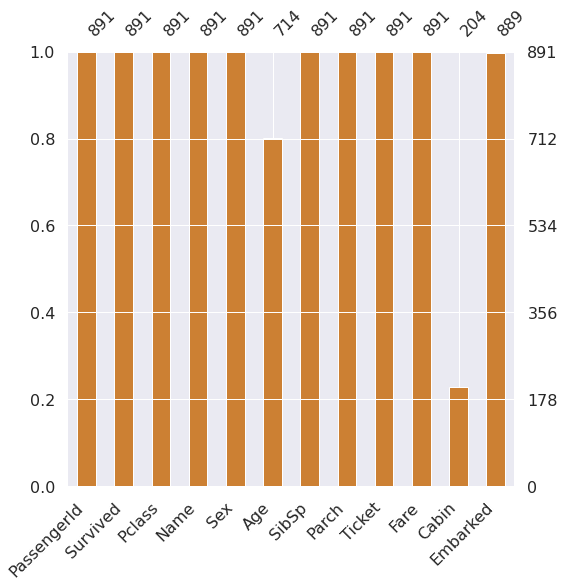

In [13]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # Null data의 양을 확인하기에 유리
plt.show()

# target 분포 확인하기

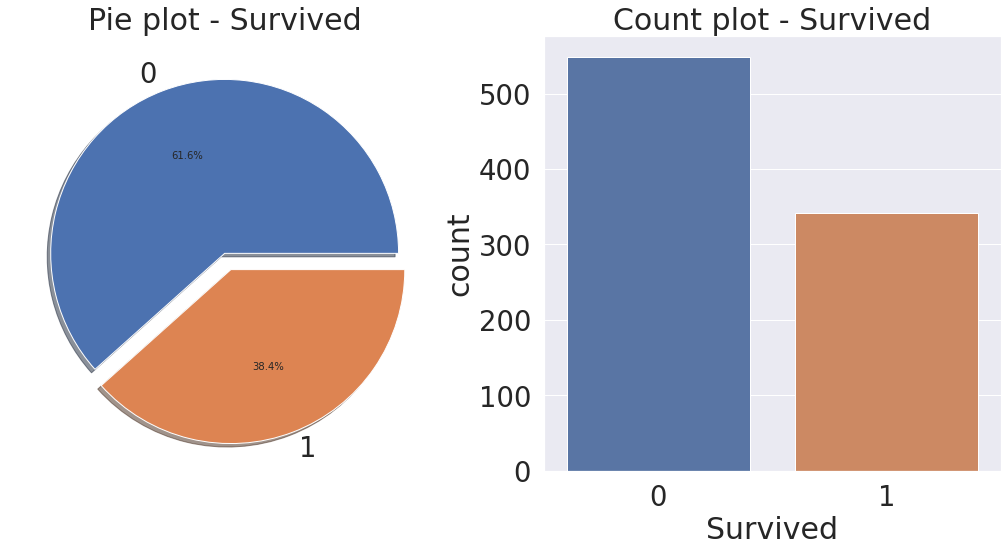

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열, f = figure(전체 plot), ax = axes(부분 plot)
                     
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1]) # Seaborn countplot() : 카테고리 별로 데이터가 얼마나 있는지 표시
ax[1].set_title('Count plot - Survived')
plt.show() 

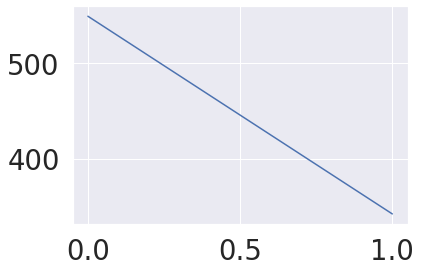

In [15]:
df_train['Survived'].value_counts().plot() # == plt.plot(df_train['Survived'].value_counts())
plt.show()

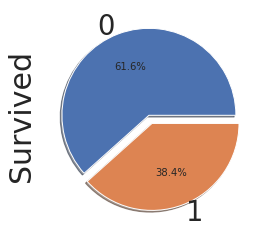

In [16]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True) #explode는 쪼개는 것, autopct는 확률, shadow는 그림자
plt.show()


# EDA - Pclass

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # Pclass별 생존자 숫자

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() # Pclass별 생존 비율

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [19]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool') 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


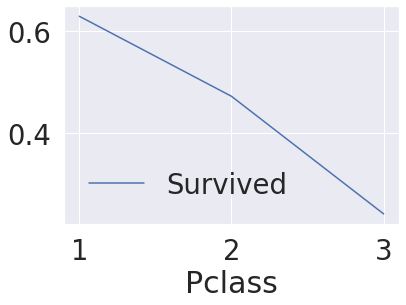

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot()
plt.show()

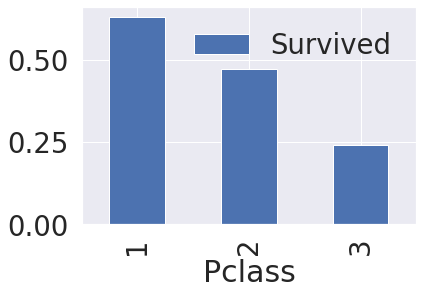

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

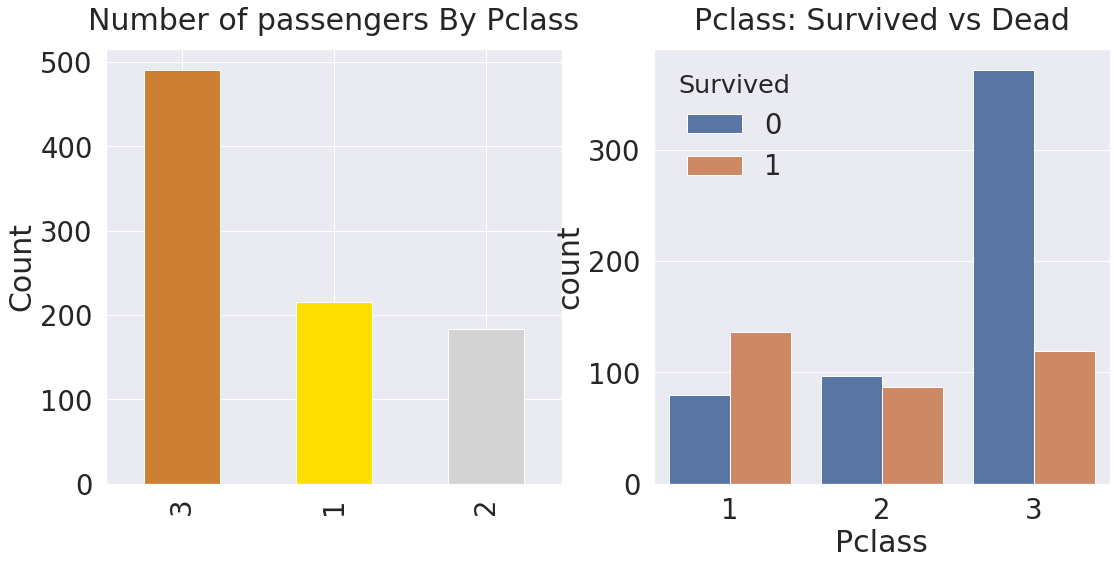

In [22]:
y_position = 1.03
f, ax = plt.subplots(1, 2, figsize=(18, 8)) 
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number of passengers By Pclass', y=y_position) 
ax[0].set_ylabel('Count') 
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position) 
plt.show()

# EDA - Sex

In [23]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).count() # Sex별 생존자 숫자

,Survived
Sex,
female,314
male,577


In [24]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean() # Sex별 생존 비율

,Survived
Sex,
female,0.742038
male,0.188908


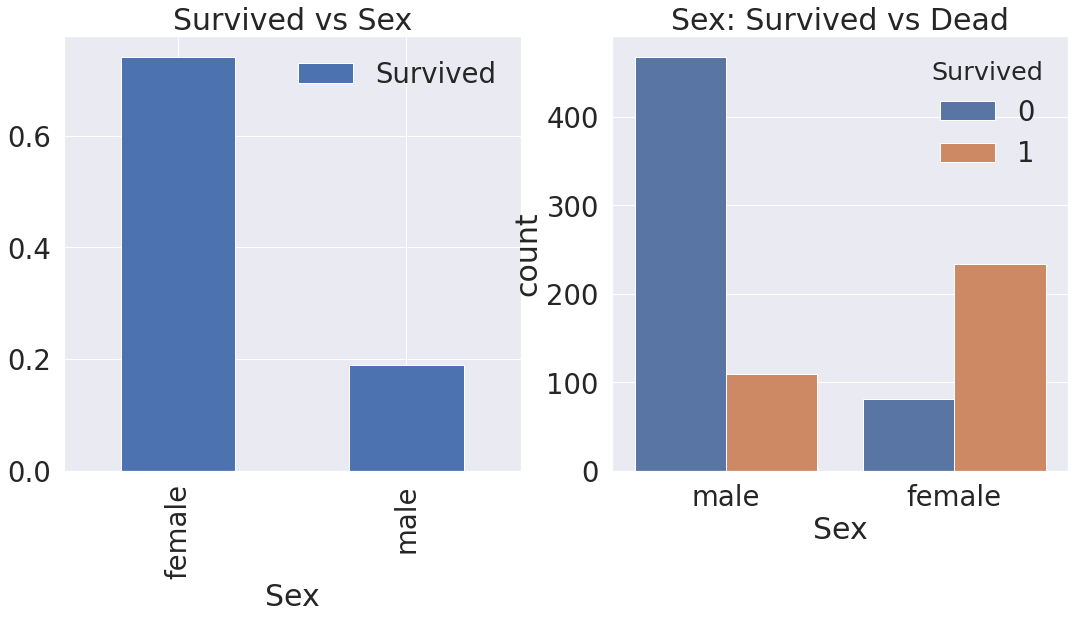

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=df_train, ax=ax[1]) 
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [26]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# Both Sex and Pclass

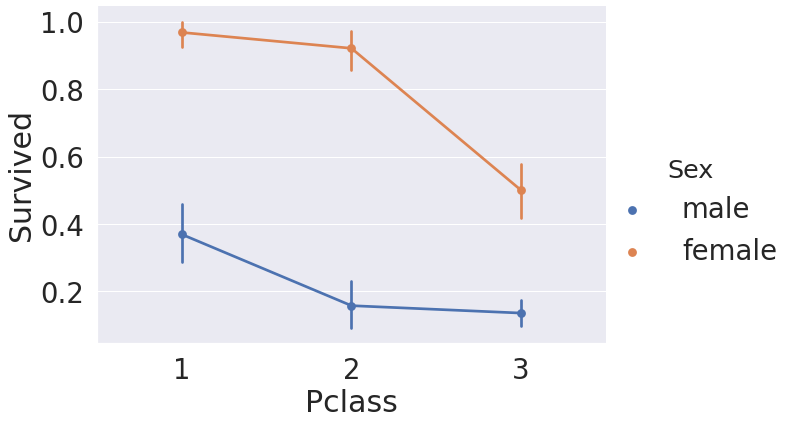

In [28]:
# seaborn factorplot
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5) # size와 aspect는 사이즈 조절기능
plt.show()

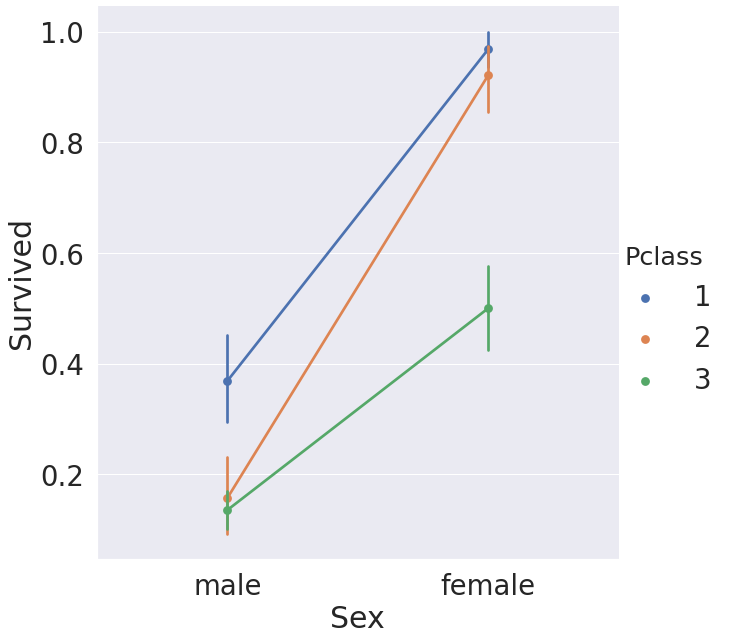

In [29]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, size=9, aspect=1)
plt.show()

# EDA - Age

In [30]:
print("제일 나이가 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("제일 나이가 어린 탑승객 : {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} years".format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0 years
제일 나이가 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


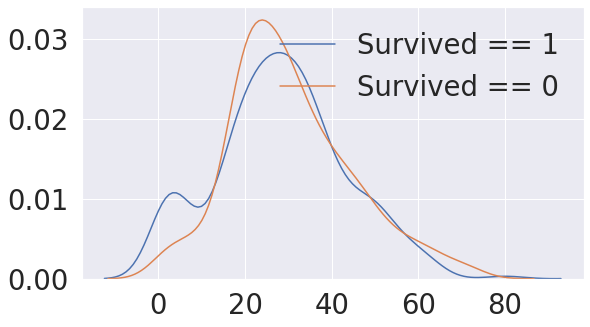

In [31]:
# 생존에 여부 따른 나이 확률 분포표
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], ax = ax)
plt.legend(["Survived == 1", "Survived == 0"])
plt.show()            

Pclass와 생존 여부에 따른 나이 확률 분포표

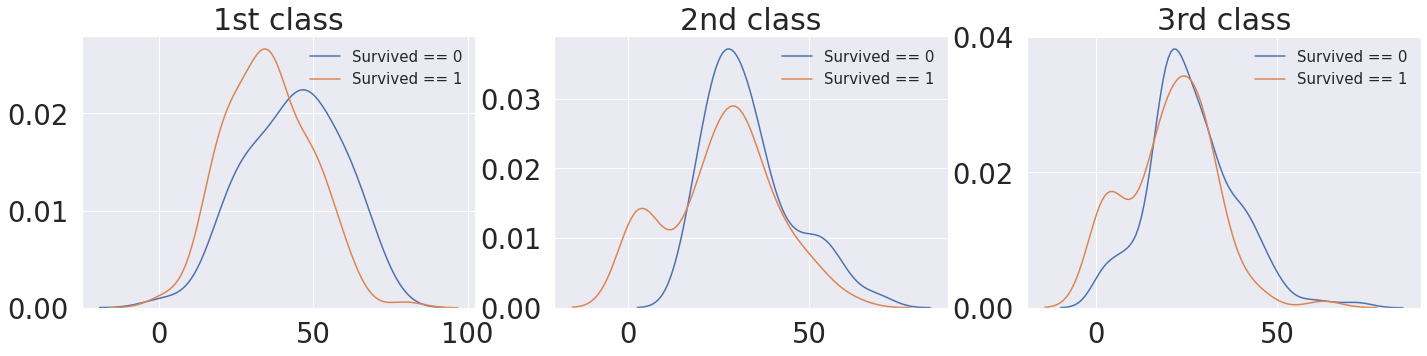

In [32]:
fig, ax = plt.subplots(1, 3, figsize = (24, 5))
# Pclass == 1
sns.kdeplot(df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 1)]["Age"], ax = ax[0])
sns.kdeplot(df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 1)]["Age"], ax = ax[0])
ax[0].legend(["Survived == 0", "Survived == 1"], prop={'size': 15})
ax[0].set_title("1st class")

# Pclass == 2
sns.kdeplot(df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 2)]["Age"], ax = ax[1])
sns.kdeplot(df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 2)]["Age"], ax = ax[1])
ax[1].legend(["Survived == 0", "Survived == 1"], prop={'size': 15})
ax[1].set_title("2nd class")

# Pclass == 3
sns.kdeplot(df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 3)]["Age"], ax = ax[2])
sns.kdeplot(df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 3)]["Age"], ax = ax[2])
ax[2].legend(["Survived == 0", "Survived == 1"], prop={'size': 15})
ax[2].set_title("3rd class")

plt.show()

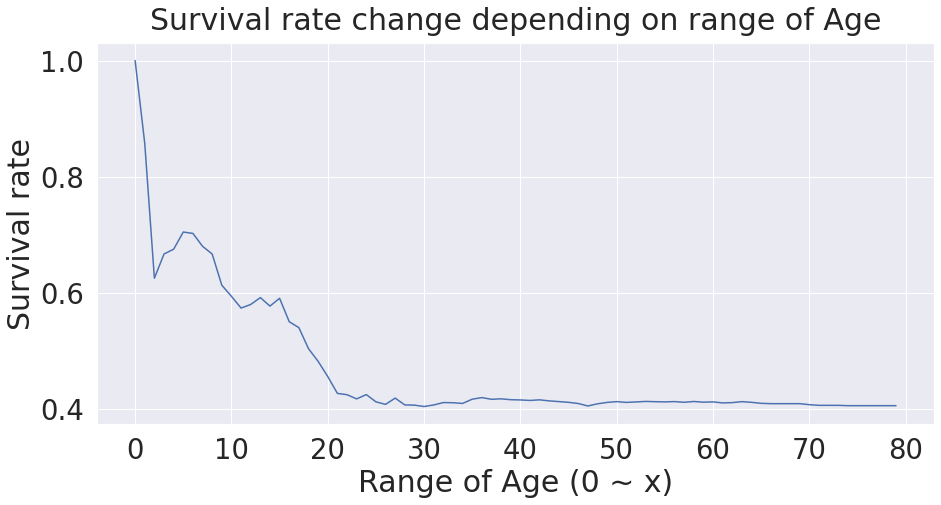

In [33]:
# 연령에 따른 생존 확률
age_range_survival_ratio = []

for i in range(1, 81):
    age_range_survival_ratio.append(df_train[df_train["Age"] < i]["Survived"].sum() / len(df_train[df_train["Age"] < i]["Survived"]))

plt.figure(figsize = (15, 7))
plt.plot(age_range_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.xlabel("Range of Age (0 ~ x)")
plt.ylabel("Survival rate")
plt.show()

[0.4019607843137255, 0.35, 0.437125748502994, 0.38202247191011235, 0.4166666666666667, 0.3157894736842105]


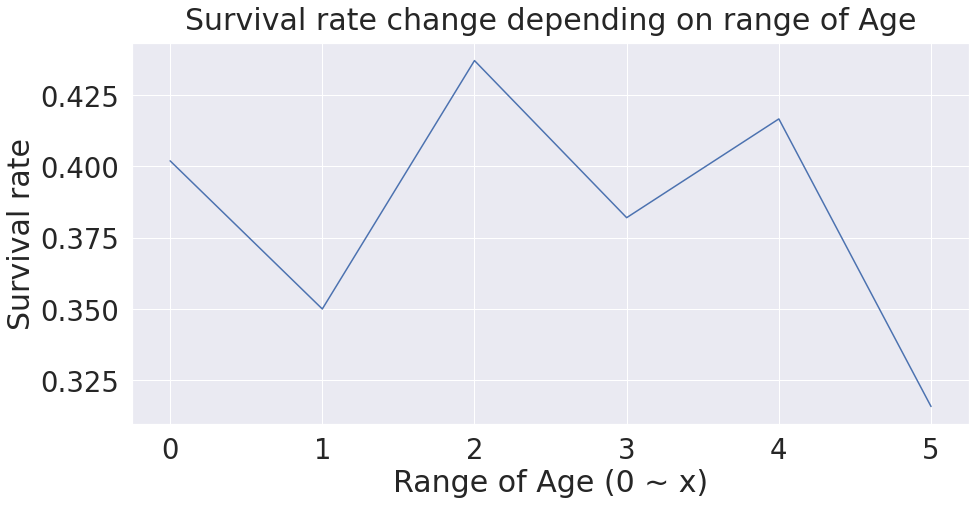

In [34]:
# 연령구간 별 생존 확률
age_range_survival_ratio = []

for i in range(10, 70, 10):
    age_range_survival_ratio.append(df_train[(df_train["Age"] >= i) & (df_train["Age"] < i + 10)]["Survived"].sum() / len(df_train[(df_train["Age"] >= i) & (df_train["Age"] < i + 10)]["Survived"]))
    
print(age_range_survival_ratio)
plt.figure(figsize = (15, 7))
plt.plot(age_range_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.xlabel("Range of Age (0 ~ x)")
plt.ylabel("Survival rate")
plt.show()

# Pclass, Sex, Age

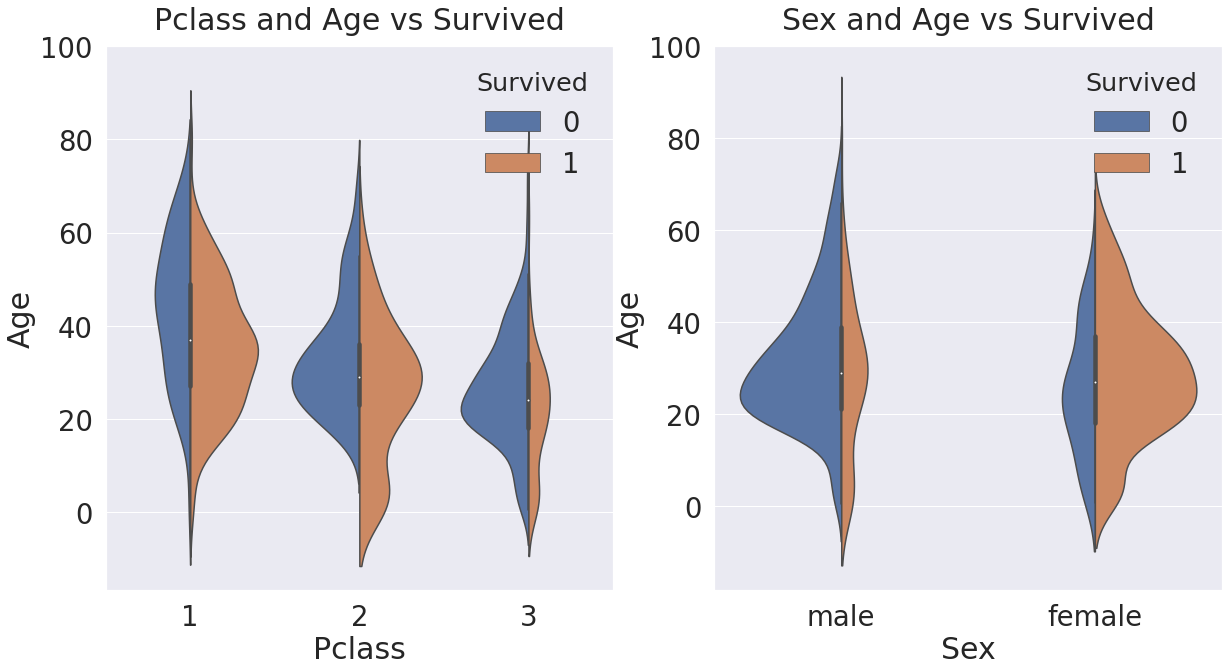

In [35]:
# seaborn violinplot
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.violinplot("Pclass", "Age", hue = "Survived", data = df_train, scale = "count", split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived", y = 1.02)
ax[0].set_yticks(range(0, 110, 20))

sns.violinplot("Sex", "Age", hue = "Survived", data = df_train, scale = "count", split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived", y = 1.02)
ax[1].set_yticks(range(0, 110, 20))
plt.show()

# EDA - Embarked

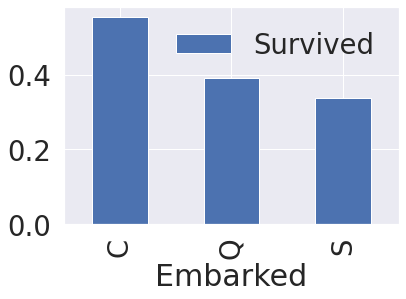

In [36]:
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar()
plt.show()

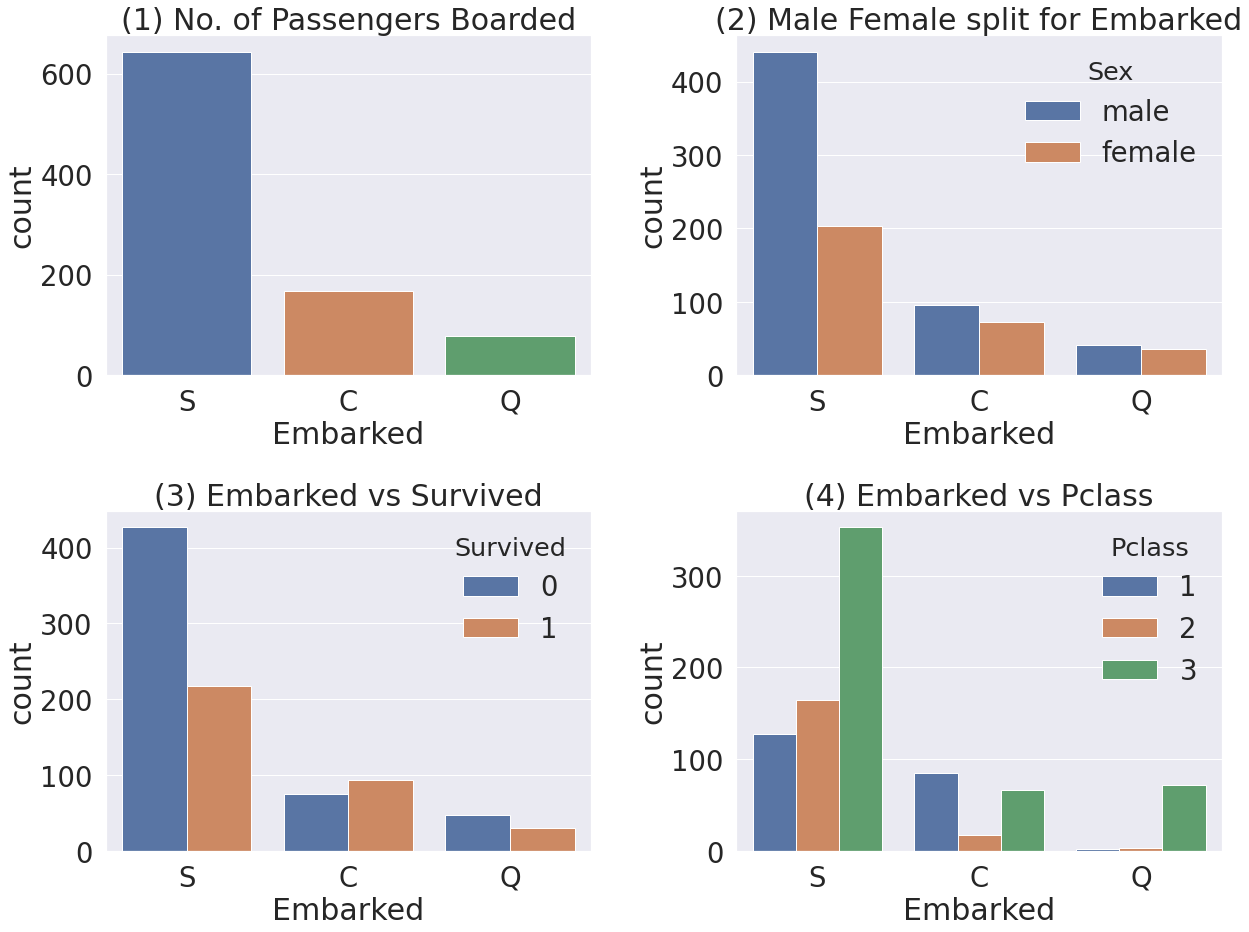

In [37]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot("Embarked", data = df_train, ax=ax[0, 0])
ax[0, 0].set_title("(1) No. of Passengers Boarded")

sns.countplot("Embarked", hue = "Sex", data = df_train, ax = ax[0, 1])
ax[0, 1].set_title("(2) Male Female split for Embarked")

sns.countplot("Embarked", hue = "Survived", data = df_train, ax = ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked", hue = "Pclass", data = df_train, ax = ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace= 0.3, hspace = 0.4)
plt.show()

# EDA - Familysize(SibSp + Parch)

In [38]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1  # 본인도 포함(+1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [39]:
print("Maximum size of Family :", df_train["FamilySize"].max())
print("Minimum size of Family :", df_train["FamilySize"].min())

Maximum size of Family : 11
Minimum size of Family : 1


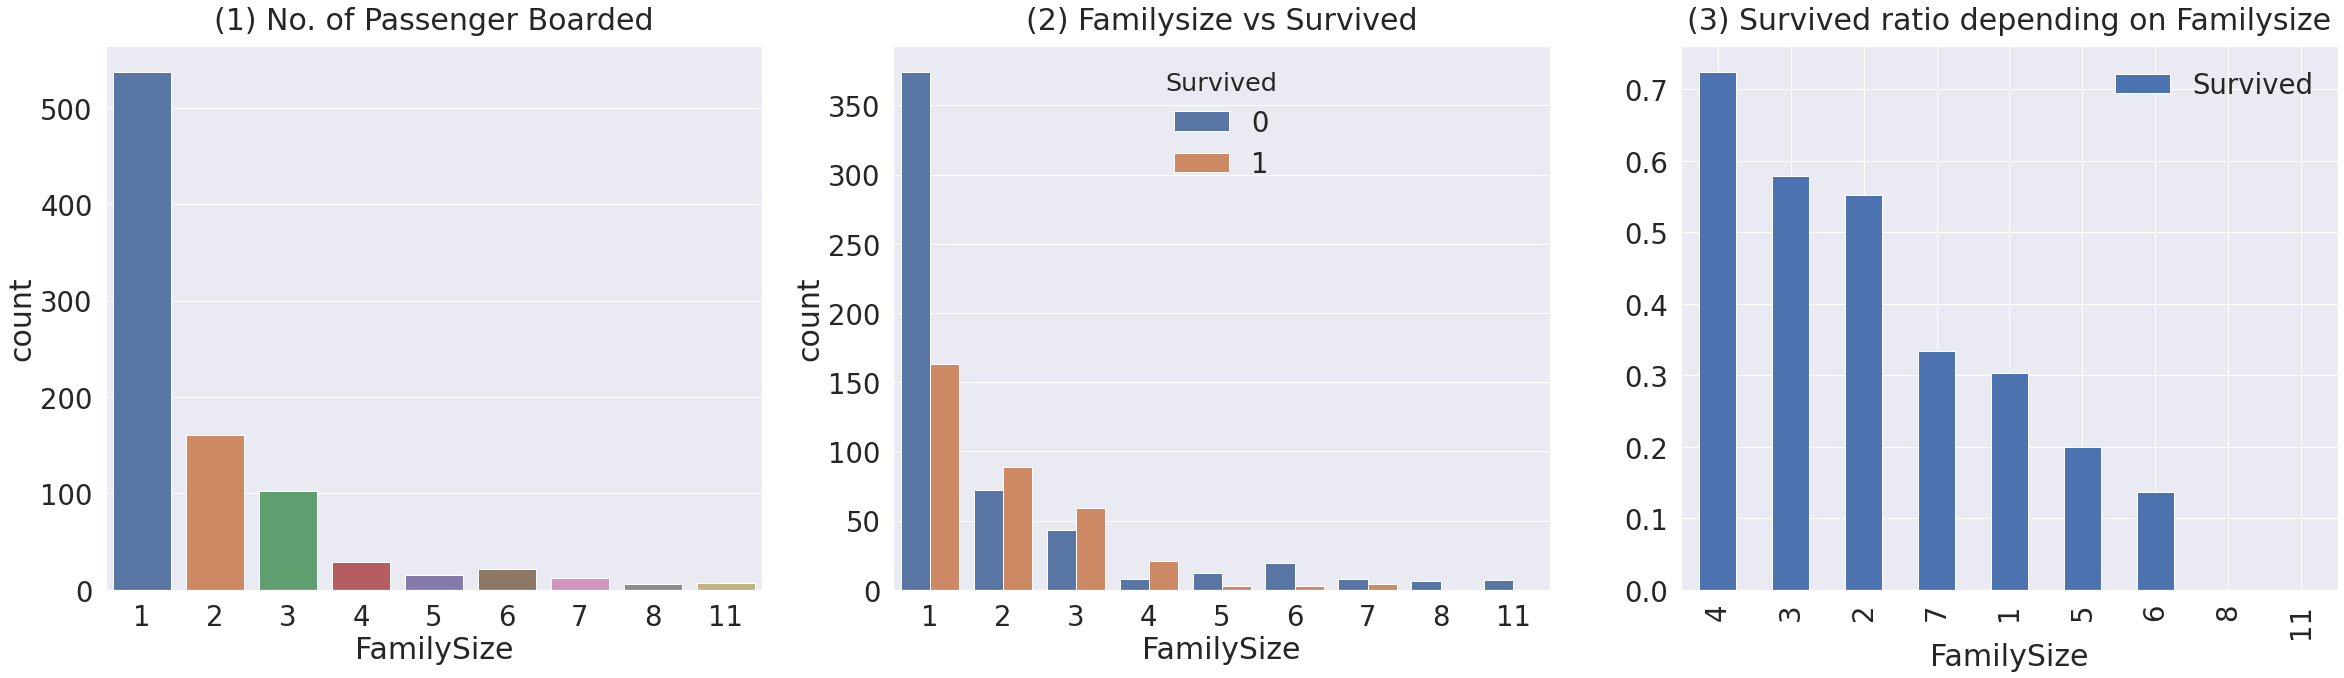

In [40]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot("FamilySize", data = df_train, ax = ax[0])
ax[0].set_title("(1) No. of Passenger Boarded", y = 1.02)

sns.countplot("FamilySize", hue = "Survived", data = df_train, ax = ax[1])
ax[1].set_title("(2) Familysize vs Survived", y = 1.02)

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[2])
ax[2].set_title("(3) Survived ratio depending on Familysize", y = 1.02)

plt.show()